In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras

In [2]:
df=pd.read_csv("C:\\Data\\advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

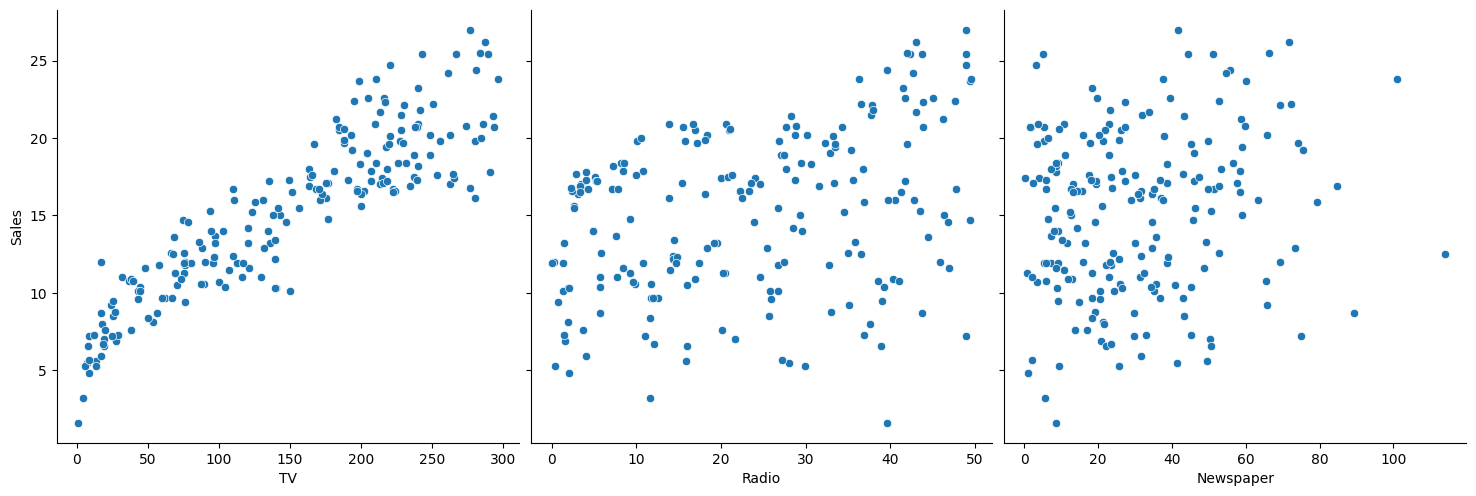

In [11]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter',height=5)

<Axes: >

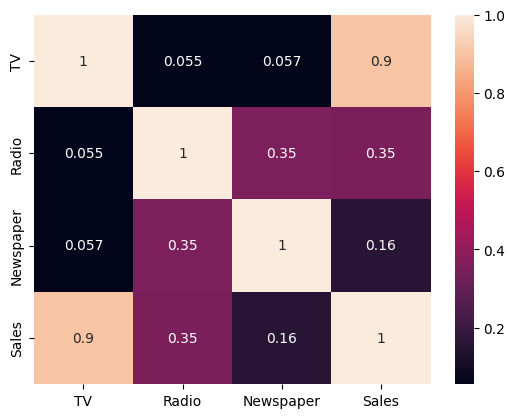

In [12]:
sns.heatmap(df.corr(),annot=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_12956\1073664232.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade=True)


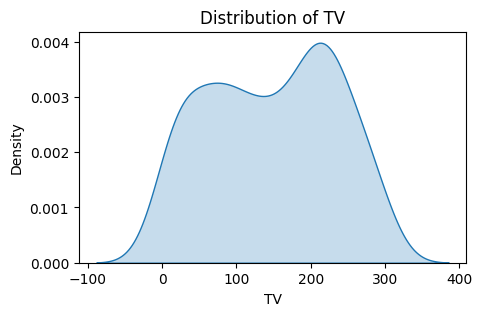

C:\Users\deepa\AppData\Local\Temp\ipykernel_12956\1073664232.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade=True)


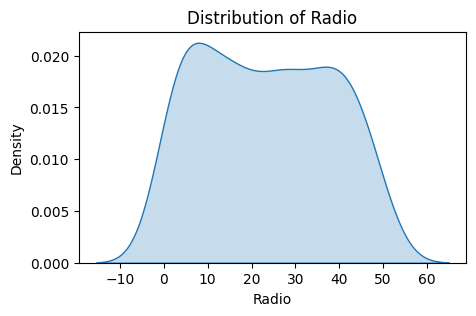

C:\Users\deepa\AppData\Local\Temp\ipykernel_12956\1073664232.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],shade=True)


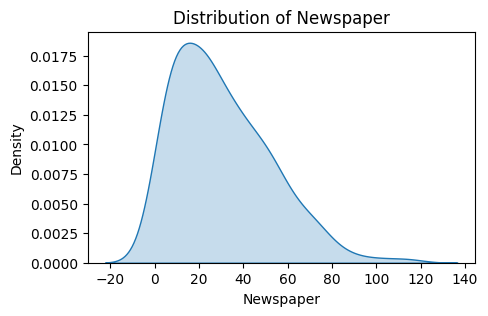

In [9]:
features=['TV','Radio','Newspaper']
for col in features:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[col],shade=True)
    plt.title(f"Distribution of {col}",fontsize=12)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Density",fontsize=10)
    plt.show()

<Axes: >

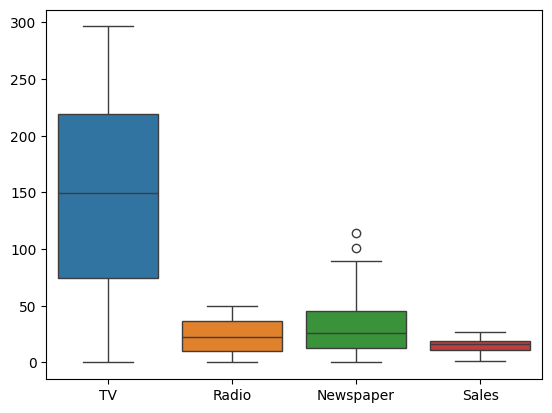

In [10]:
sns.boxplot(df)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Sales'],axis='columns'),df['Sales'],test_size=0.2,random_state=5)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
regressor = GradientBoostingRegressor()

In [14]:
regressor.fit(X_train,y_train)

GradientBoostingRegressor()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)

In [18]:
score,mae

(0.9618549995078011, 0.7519941597036682)